In [70]:
library(monocle3)
library(Seurat)
library(patchwork)
library(ggplot2)

In [71]:
sceObj <- readRDS( "CD4+T.rds")
expression <- GetAssayData(sceObj, assay = 'RNA', slot = 'counts')
cell_metadata <- sceObj@meta.data
gene_annotation <- data.frame(gene_short_name = rownames(expression))
rownames(gene_annotation) <- rownames(expression)
monocle_cds <- new_cell_data_set(expression, cell_metadata = cell_metadata, gene_metadata = gene_annotation)

In [72]:
sceObj@reductions$pca <- NULL
sceObj@reductions$apca <- NULL
sceObj@reductions$wnn.umap <- NULL

No trajectory to plot. Has learn_graph() been called yet?



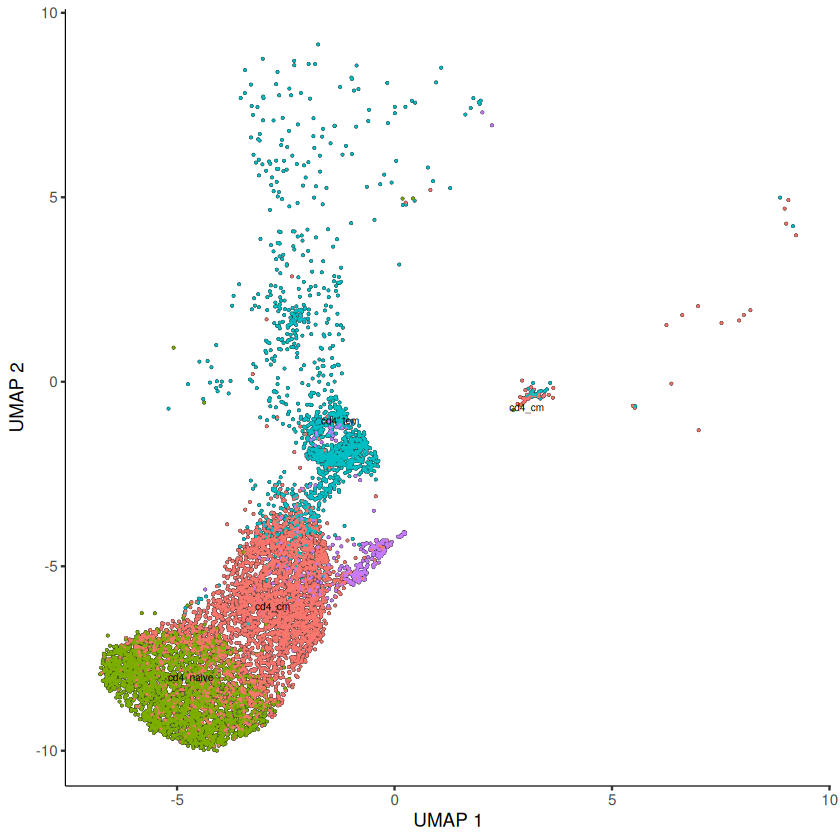

In [73]:
monocle_cds@int_colData$reducedDims$UMAP <- sceObj@reductions$umap@cell.embeddings
monocle_cds <- cluster_cells(monocle_cds)
plot_cells(monocle_cds, color_cells_by = "cell_type1")

In [74]:
monocle_cds <- learn_graph(monocle_cds)

  |======================================================================| 100%


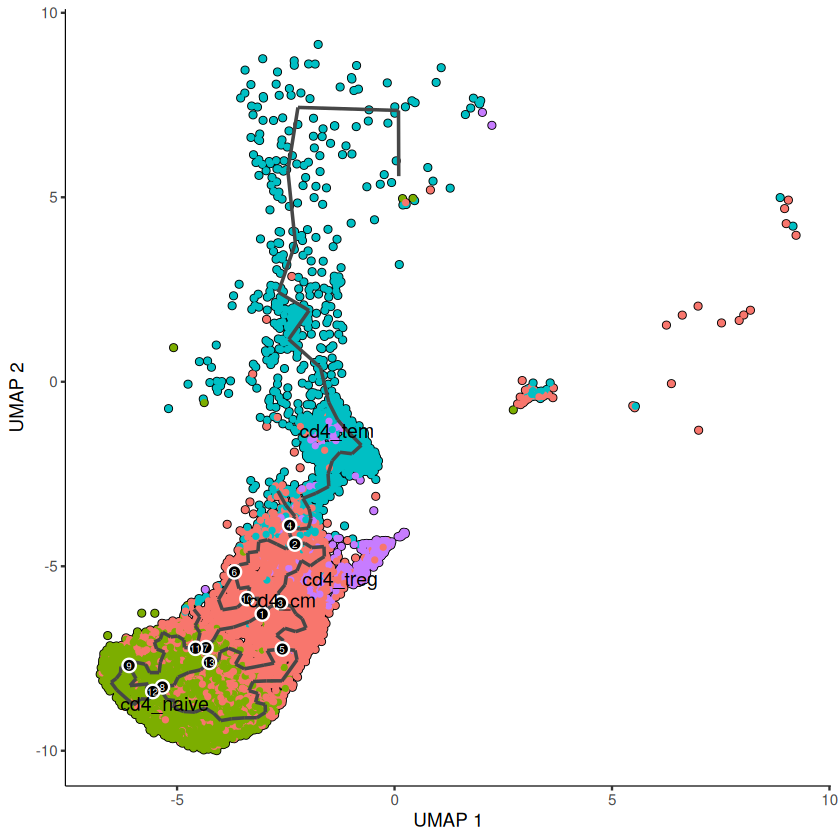

In [75]:
plot_cells(monocle_cds,
           color_cells_by = "cell_type1",
           label_groups_by_cluster = FALSE,
           label_leaves = FALSE,
           label_branch_points = TRUE,
           group_label_size = 4,
           cell_size = 1)

In [ ]:
get_earliest_principal_node <- function(monocle_cds, time_bin=c('cd4_naive')){
    cell_ids <- which(colData(monocle_cds)[, "cell_type1"] == time_bin)
    closest_vertex <- monocle_cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
    closest_vertex <- as.matrix(closest_vertex[colnames(monocle_cds), ])
    root_pr_nodes <- igraph::V(principal_graph(monocle_cds)[["UMAP"]])$name[as.numeric(names(which.max(table(closest_vertex[cell_ids,]))))] # igraph::V()函数获取主成分图中的所有顶点信息
    root_pr_nodes
}

In [77]:
nodes_vec <- c(get_earliest_principal_node(monocle_cds))
monocle_cds <- order_cells(monocle_cds, root_pr_nodes = nodes_vec, reduction_method = "UMAP")

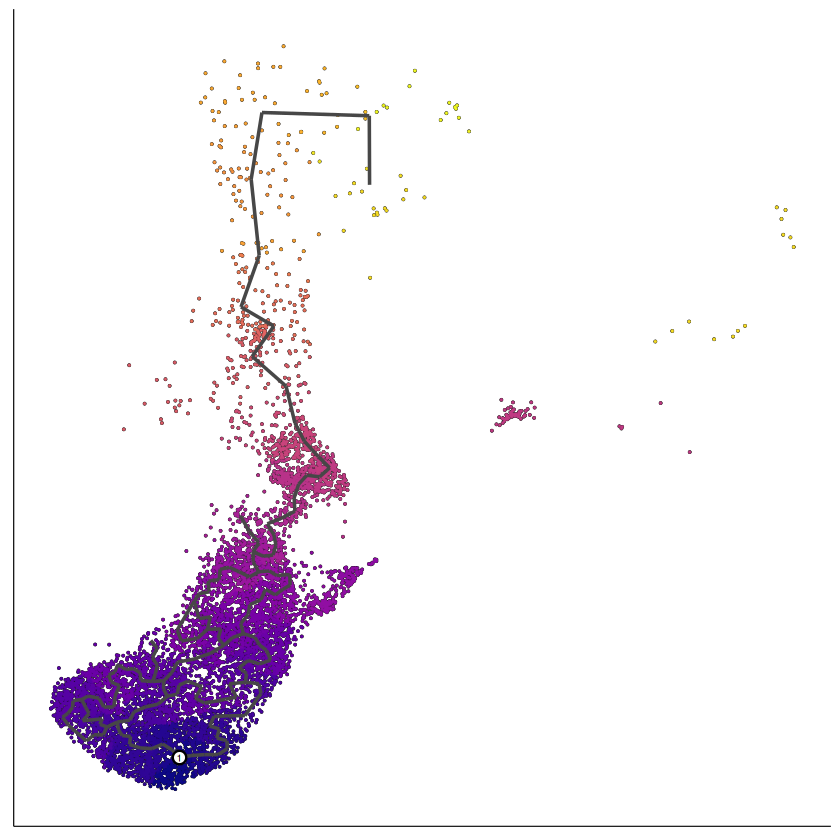

In [97]:
p <- plot_cells(monocle_cds,
           color_cells_by = "pseudotime",
           show_trajectory_graph = TRUE, 
           label_cell_groups=FALSE,
           label_leaves = FALSE,
           label_branch_points = FALSE) + 
           theme(axis.ticks = element_blank(), axis.text = element_blank()) +  
           theme(legend.position = c(1, 0.7), legend.justification = c(1,0))
p
ggsave("figure_11.png", p, dpi = 300, width = 3, height = 3)

In [79]:
sceObj2 <- readRDS( "CD8+T.rds")
expression <- GetAssayData(sceObj2, assay = 'RNA', slot = 'counts')
cell_metadata <- sceObj2@meta.data
gene_annotation <- data.frame(gene_short_name = rownames(expression))
rownames(gene_annotation) <- rownames(expression)
monocle_cds2 <- new_cell_data_set(expression, cell_metadata = cell_metadata, gene_metadata = gene_annotation)

In [80]:
sceObj2@reductions$pca <- NULL
sceObj2@reductions$apca <- NULL
sceObj2@reductions$wnn.umap <- NULL

No trajectory to plot. Has learn_graph() been called yet?



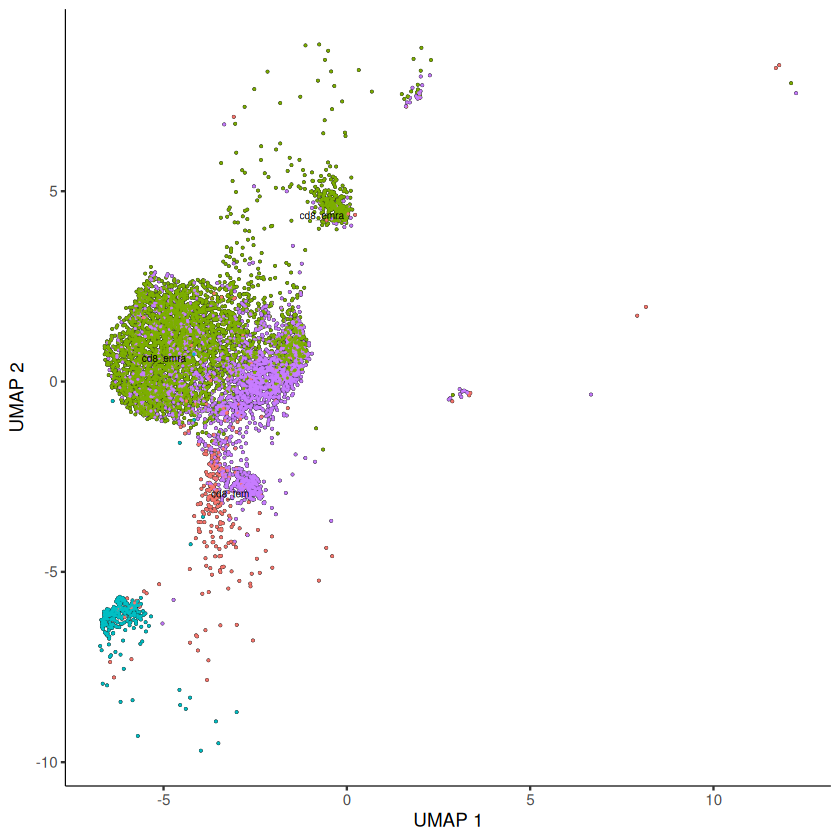

In [81]:
monocle_cds2@int_colData$reducedDims$UMAP <- sceObj2@reductions$umap@cell.embeddings
monocle_cds2 <- cluster_cells(monocle_cds2)
plot_cells(monocle_cds2, color_cells_by = "cell_type1")

  |======================================================================| 100%


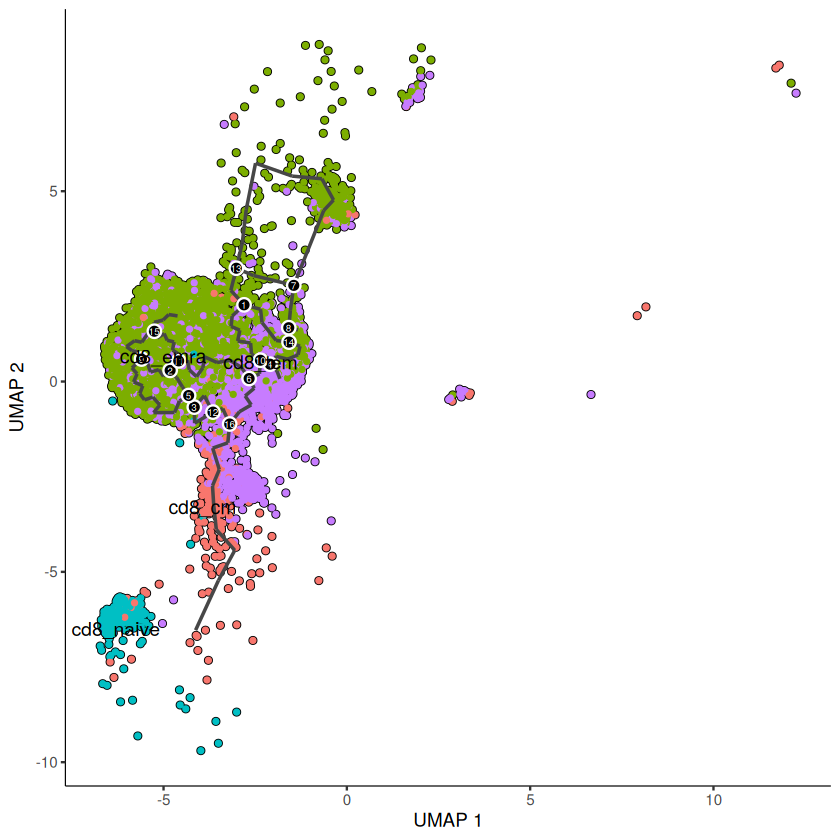

In [82]:
monocle_cds2 <- learn_graph(monocle_cds2)
plot_cells(monocle_cds2,
           color_cells_by = "cell_type1",
           label_groups_by_cluster = FALSE,
           label_leaves = FALSE,
           label_branch_points = TRUE,
           group_label_size = 4,
           cell_size = 1)

In [ ]:
get_earliest_principal_node <- function(monocle_cds2, time_bin=c('cd8_naive')){
    cell_ids <- which(colData(monocle_cds2)[, "cell_type1"] == time_bin)
    closest_vertex <- monocle_cds2@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
    closest_vertex <- as.matrix(closest_vertex[colnames(monocle_cds2), ])
    root_pr_nodes <- igraph::V(principal_graph(monocle_cds2)[["UMAP"]])$name[as.numeric(names(which.max(table(closest_vertex[cell_ids,]))))] # igraph::V()函数获取主成分图中的所有顶点信息
    root_pr_nodes
}

In [84]:
nodes_vec <- c(get_earliest_principal_node(monocle_cds2))
monocle_cds2 <- order_cells(monocle_cds2, root_pr_nodes = nodes_vec, reduction_method = "UMAP")

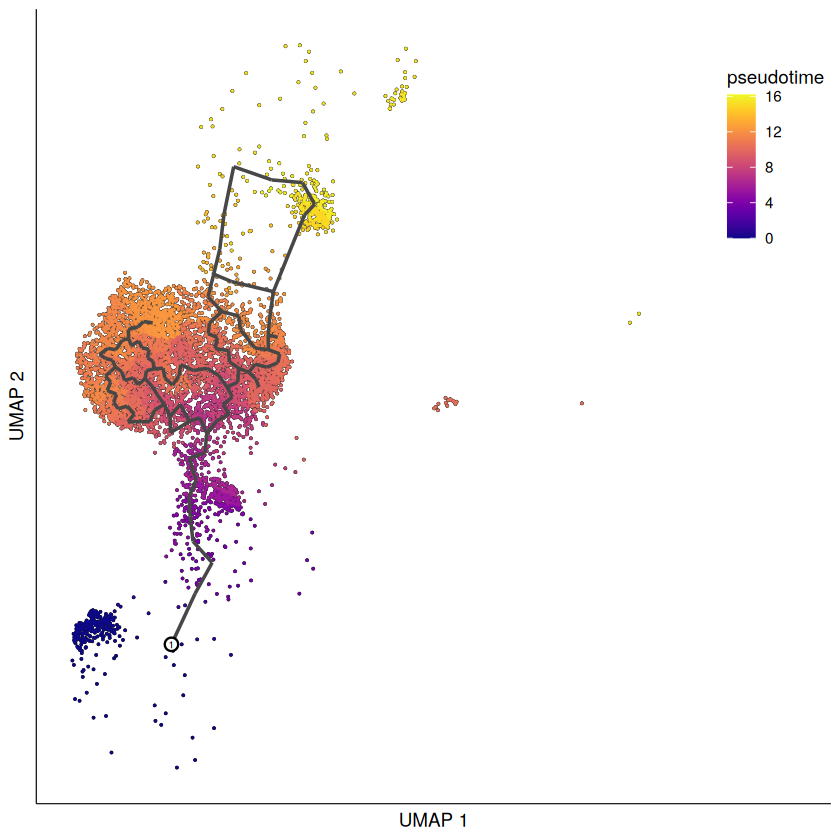

In [98]:
p <- plot_cells(monocle_cds2,
           color_cells_by = "pseudotime",
           show_trajectory_graph = TRUE, 
           label_cell_groups=FALSE,
           label_leaves = FALSE,
           label_branch_points = FALSE) + 
           theme(axis.ticks = element_blank(), axis.text = element_blank()) +  
           theme(legend.position = c(1, 0.7), legend.justification = c(1,0))
p
ggsave("figure4_10.png", p, dpi = 300, width = 3, height = 3)